## SVM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_cleaned_v5.csv")

In [3]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [4]:
def removeOutlier(df, col):
    quartis = np.percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = df[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

<AxesSubplot:xlabel='price'>

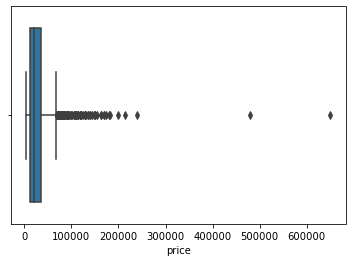

In [5]:
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='price'>

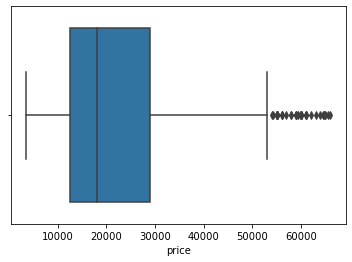

In [6]:
df = removeOutlier(df, 'price')

sns.boxplot(x=df['price'])

In [7]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                        57
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               19
num_cores                      1
processor_speed               25
battery_capacity               7
fast_charging_available        0
fast_charging                175
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              1
os                             3
primary_camera_rear            0
primary_camera_front           2
extended_memory_available      0
extended_upto                385
dtype: int64

In [8]:
df.dropna(subset=['rating'], inplace=True)

In [9]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                         0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               16
num_cores                      1
processor_speed               22
battery_capacity               6
fast_charging_available        0
fast_charging                140
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              0
os                             2
primary_camera_rear            0
primary_camera_front           1
extended_memory_available      0
extended_upto                356
dtype: int64

<AxesSubplot:>

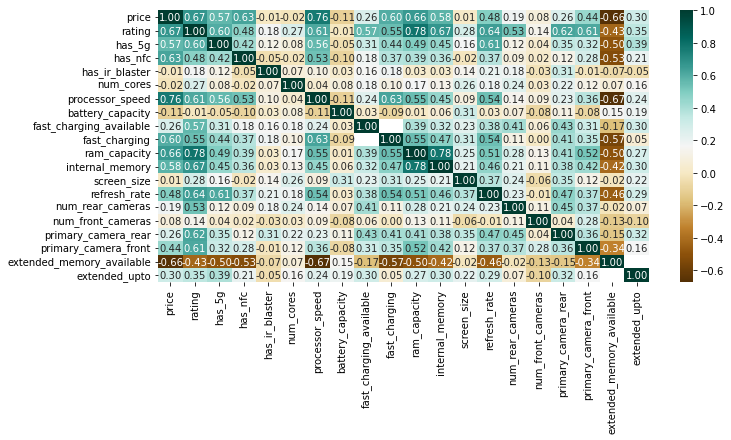

In [10]:
numeric_df = df.select_dtypes(include='number')
c = numeric_df.corr()
plt.figure(figsize=(11, 5))
sns.heatmap(c, cmap="BrBG", annot=True, fmt=".2f")

In [11]:
missing_value = df[["price", "ram_capacity", "processor_speed", "screen_size", "has_5g", "has_nfc", "refresh_rate", "rating"]].isnull().sum()
missing_value

price               0
ram_capacity        0
processor_speed    22
screen_size         0
has_5g              0
has_nfc             0
refresh_rate        0
rating              0
dtype: int64

In [12]:
df["processor_speed"] = df["processor_speed"].fillna(df["processor_speed"].median())

In [13]:
df = df[["price", "ram_capacity", "processor_speed", "screen_size", "refresh_rate", "has_5g", "has_nfc", "rating"]]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:7].values
Y = df.iloc[:, 7].values

ssx, ssy = StandardScaler(), StandardScaler()

Xs = ssx.fit_transform(X)
Ys = ssy.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys.ravel(), test_size=300, random_state=1000)

svr = SVR(kernel='rbf', gamma=0.75, C=2.8, cache_size=500, epsilon=0.1)

svr.fit(X_train, Y_train)
Y_pred = svr.predict(Xs)

print(svr)

SVR(C=2.8, cache_size=500, gamma=0.75)


In [15]:
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))

0.9370072994859754
0.7835280579520594


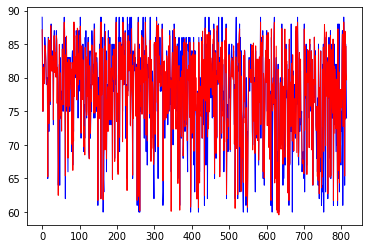

In [16]:
plt.plot(ssy.inverse_transform(Ys), color="blue", linewidth=1)
plt.plot(ssy.inverse_transform(Y_pred.reshape(-1,1)), color="red", linewidth=1)

#plt.plot(Ys, color="blue", linewidth=1)
#plt.plot(Y_pred.reshape(-1,1), color="red", linewidth=1)

plt.show()

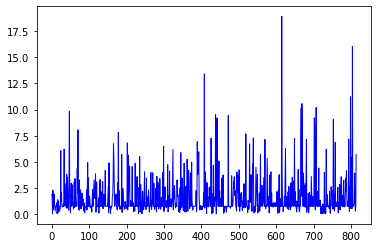

In [17]:
plt.plot(abs(ssy.inverse_transform(Ys)-ssy.inverse_transform(Y_pred.reshape(-1,1))), color="blue", linewidth=1)

plt.show()

In [18]:
X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

ssx, ssy = StandardScaler(), StandardScaler()

Xs = ssx.fit_transform(X)
Ys = ssy.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys.ravel(), test_size=300, random_state=1000)

svr = SVR(kernel='rbf', gamma=0.75, C=2.8, cache_size=500, epsilon=0.1)

svr.fit(X_train, Y_train)
Y_pred = svr.predict(Xs)

print(svr)

SVR(C=2.8, cache_size=500, gamma=0.75)


In [19]:
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))

0.942607784748816
0.6468560489395734


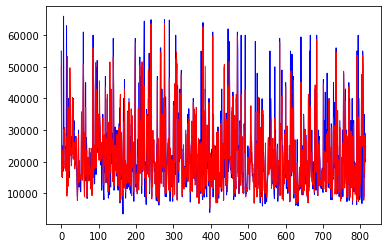

In [20]:
plt.plot(ssy.inverse_transform(Ys), color="blue", linewidth=1)
plt.plot(ssy.inverse_transform(Y_pred.reshape(-1,1)), color="red", linewidth=1)

#plt.plot(Ys, color="blue", linewidth=1)
#plt.plot(Y_pred.reshape(-1,1), color="red", linewidth=1)

plt.show()

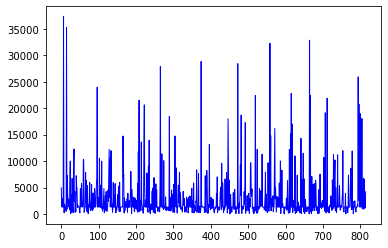

In [21]:
plt.plot(abs(ssy.inverse_transform(Ys)-ssy.inverse_transform(Y_pred.reshape(-1,1))), color="blue", linewidth=1)

plt.show()

## Redes Neurais

In [83]:
df = pd.read_csv("smartphone_cleaned_v5.csv")

<AxesSubplot:xlabel='price'>

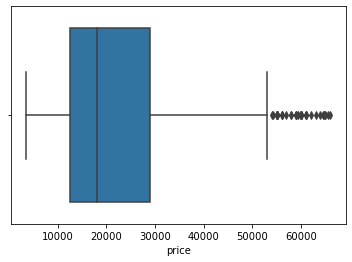

In [84]:
df = removeOutlier(df, 'price')

sns.boxplot(x=df['price'])

In [85]:
df.dropna(subset=['rating'], inplace=True)

In [86]:
df["processor_speed"] = df["processor_speed"].fillna(df["processor_speed"].median())

In [87]:
df = df[["price", "ram_capacity", "processor_speed", "screen_size", "refresh_rate", "has_5g", "has_nfc", "rating"]]

In [91]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

width = height = X_train.shape[1]

#X_train = X_train.reshape((X_train.shape[0], width * height)).astype(np.float32) / 255.0
#X_test = X_test.reshape((X_test.shape[0], width * height)).astype(np.float32) / 255.0

#Y_train = to_categorical(Y_train, num_classes=8)
#Y_test = to_categorical(Y_test, num_classes=8)

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import legacy

model = Sequential()

model.add(Dense(2048, input_shape=(7, )))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(optimizer=legacy.Adam(learning_rate=0.001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
history = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_test, Y_test))

Epoch 1/50


ValueError: in user code:

    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\MASTER\anaconda3\lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 979
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            815 non-null    int64  
 1   ram_capacity     815 non-null    float64
 2   processor_speed  815 non-null    float64
 3   screen_size      815 non-null    float64
 4   refresh_rate     815 non-null    int64  
 5   has_5g           815 non-null    bool   
 6   has_nfc          815 non-null    bool   
 7   rating           815 non-null    float64
dtypes: bool(2), float64(4), int64(2)
memory usage: 46.2 KB


In [48]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
model = Sequential()

model.add(Dense(64, input_dim=2))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, Y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).